In [1]:
!pip install scikit-learn pandas numpy matplotlib ucimlrepo


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import sklearn
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_blobs
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import *

from ucimlrepo import fetch_ucirepo 

In [3]:
# Run this in a notebook cell
import sys
print(sys.executable)


c:\Users\ssrak\OneDrive - The Pennsylvania State University\DS 310\Honors Project\venv\Scripts\python.exe


In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=17) 

# need this to graph later
df = breast_cancer_wisconsin_original.data.original
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_original.data.features 
y = breast_cancer_wisconsin_original.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_original.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_original.variables) 

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [5]:
X.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
y.head()

,Diagnosis
0,M
1,M
2,M
3,M
4,M


In [7]:
y['Diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [8]:
df

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


In [9]:
#creating smaller subset of data frame seperated by target class (malignant vs benign)
#benign tumors
benign = df[df["Diagnosis"] == 'B']
#malignant tumors
malignant= df[df["Diagnosis"] == 'M']

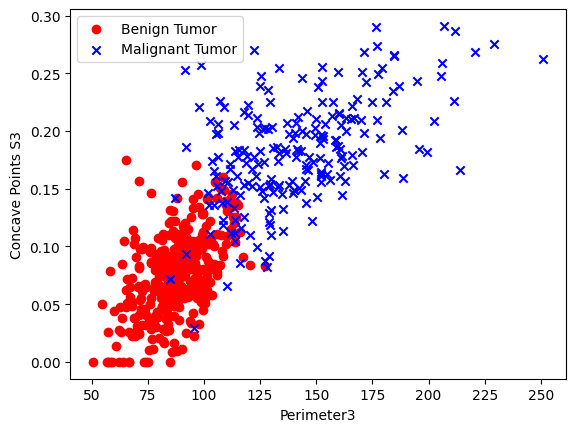

In [10]:
#uSing the columns of perimeter3 vs Concave Points from the subset dataframes
#these two features remove the most entropy from the decision tree 
plt.scatter(benign['perimeter3'], benign['concave_points3'], color='red', marker='o', label='Benign Tumor')
plt.scatter(malignant['perimeter3'], malignant['concave_points3'], color='blue', marker='x', label = 'Malignant Tumor')

plt.xlabel("Perimeter3")
plt.ylabel("Concave Points S3")
plt.legend(loc='upper left')

plt.show()

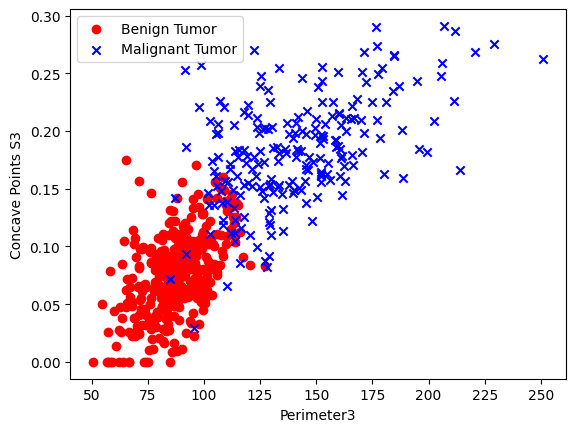

In [11]:
#uSing the columns of uniformity of cell shape vs uniformity of cell size from the subset dataframes
#uSing the columns of perimeter3 vs Concave Points from the subset dataframes
#these two features remove the most entropy from the decision tree 
plt.scatter(benign['perimeter3'], benign['concave_points3'], color='red', marker='o', label='Benign Tumor')
plt.scatter(malignant['perimeter3'], malignant['concave_points3'], color='blue', marker='x', label = 'Malignant Tumor')

plt.xlabel("Perimeter3")
plt.ylabel("Concave Points S3")
plt.legend(loc='upper left')

plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.20, random_state = 887)
#splitting the training dataset into a 80, 20 split for 80% in training, and 20% testing

In [13]:
clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 887, max_depth=1) #max depth one so only making the root node of the decision tree
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=887)

In [14]:
column_names = X.columns #extracting columns
feature_names = list(column_names)
print(feature_names) #finding the different characteristics of the data

['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']


In [15]:
!pip install graphviz


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import graphviz #package to create differetn types of graphs

dot_data= tree.export_graphviz(clf, out_file=None, feature_names= feature_names)
graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [17]:
clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 887) #no max depth - will go on until zero uncertainty/entropy
clf.fit(X_train, y_train)

dot_data= tree.export_graphviz(clf, out_file=None, feature_names= feature_names)
graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

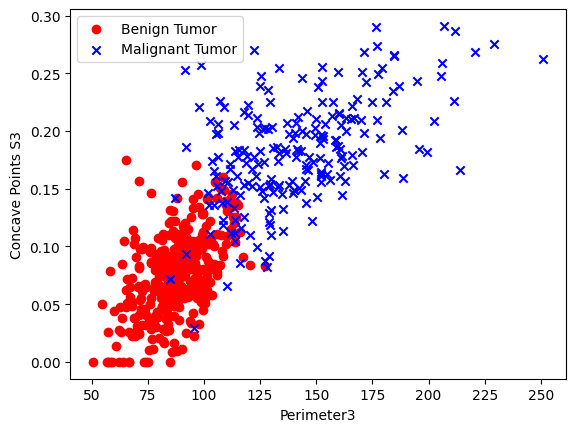

In [18]:
#uSing the columns of perimeter3 vs Concave Points from the subset dataframes
#these two features remove the most entropy from the decision tree 
plt.scatter(benign['perimeter3'], benign['concave_points3'], color='red', marker='o', label='Benign Tumor')
plt.scatter(malignant['perimeter3'], malignant['concave_points3'], color='blue', marker='x', label = 'Malignant Tumor')

plt.xlabel("Perimeter3")
plt.ylabel("Concave Points S3")
plt.legend(loc='upper left')

plt.show()

Can see that the bottom left has the most benign tumors
when the cell size uniformity is low  (below 6) and the cell clump thickness is lower as well, the tumors are most likely to be benign
